# SHAP

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from src.config import Config
from src.evaluation import SHAPExplainer
from src.train import ModelTrainer

In [2]:
cfg = Config(Path("../config/config.yaml"))

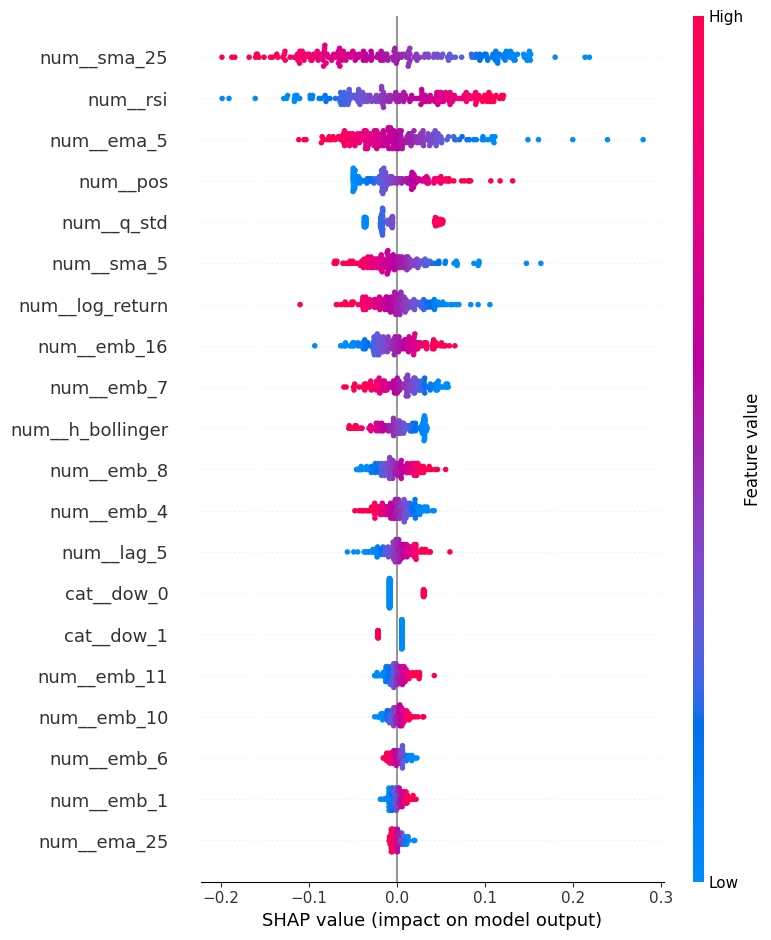

In [3]:
model_path = Path(cfg.model.path_dir) / cfg.model.enet_mo_best_30
model, preprocessor, y_scaler, _ = ModelTrainer.load(str(model_path))

X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test_30.parquet")
X_test_proc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

explainer = SHAPExplainer(
    model=model,
    preprocessor=preprocessor,
    background_data=X_test.sample(n=100, random_state=cfg.runtime.seed),
    mode="linear",
)

shap_values = explainer.explain(X_test)

shap.summary_plot(
    shap_values[0],
    X_test_proc,
    feature_names=feature_names,
    show=True
)

In [4]:
X_proc = preprocessor.transform(X_test)
y_pred_scaled = model.predict(X_proc)
print("Y scaled prediction std dev per target:\n", np.std(y_pred_scaled, axis=0))

Y scaled prediction std dev per target:
 target_0     0.144065
target_1     0.097568
target_2     0.099472
target_3     0.080133
target_4     0.093293
target_5     0.104630
target_6     0.079988
target_7     0.131287
target_8     0.150313
target_9     0.098565
target_10    0.114417
target_11    0.091901
target_12    0.137531
target_13    0.110576
target_14    0.086116
target_15    0.104715
target_16    0.109236
target_17    0.120338
target_18    0.085154
target_19    0.110976
target_20    0.107164
target_21    0.097952
target_22    0.097930
target_23    0.113059
target_24    0.093243
target_25    0.085009
target_26    0.094551
target_27    0.083725
target_28    0.113390
target_29    0.099668
dtype: float64


In [5]:
print("Feature std dev after preprocessing:\n", X_proc.std(axis=0))

Feature std dev after preprocessing:
 [1.07355278 0.9824719  0.93533912 0.94835979 0.56693754 0.66248607
 0.8703808  1.02727074 0.88175627 1.03208572 0.90666922 0.96330029
 0.7365295  0.99776259 1.05295954 0.6585203  0.68512481 0.73859238
 0.91970761 0.90187236 1.13765999 0.8241867  1.08421387 0.86677366
 0.44154264 0.53758    0.82116894 0.89568845 0.88887764 0.81445621
 0.90637367 0.90968918 0.82153045 1.02309454 0.95037045 0.05945895
 0.37048762 0.74565104 0.39287008 0.4045653  0.4045653  0.4045653
 0.39287008 0.46428966 0.38453055 0.3801874  0.47017543]


In [6]:
shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
print("SHAP mean abs:\n", np.mean(np.abs(shap_array), axis=0))

SHAP mean abs:
 [0.02869988 0.         0.         0.         0.         0.00550247
 0.         0.         0.01363467 0.00171357 0.00561875 0.02071876
 0.01625972 0.00026864 0.0074591  0.00806964 0.         0.
 0.         0.         0.02271554 0.0236784  0.05721935 0.
 0.01827757 0.         0.01280642 0.02592958 0.04195303 0.
 0.         0.         0.         0.0789685  0.00451157 0.00440739
 0.02868851 0.00010081 0.01267063 0.00874274 0.         0.
 0.         0.         0.         0.         0.        ]
